In [168]:
# import packages needed
import math
import random
import numpy as np
import matplotlib.pyplot as plt

### q1-a

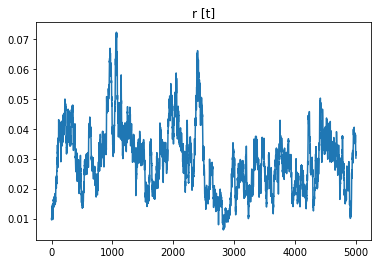

In [257]:
N = 5000
dt = 0.01
T = 5000 * 0.01
sigma = 0.1
theta = 0.03
rt = np.ones(N+1) * 0.01
dW = np.random.normal(0, 1, 5000) * np.sqrt(dt)
for i in range(1, N):
    rt[i+1] = rt[i] + (theta-rt[i])*dt + sigma*np.sqrt(rt[i])*dW[i]
plt.plot(rt)
plt.title('r [t]')
plt.show()

From the plot above, we could know that rt is always above x axis, which suggests that rt is >= 0.

### q1-b

In [258]:
r0 = 0.01
sigma = 0.1
theta = 0.03
k = 1
h = np.sqrt(k**2 + 2*sigma**2)
T = [0.01 * i for i in range(3001)]
F = np.zeros(3001)

for i in range(len(T)):
    denominator = 2*h + (k+h) * (np.exp(T[i]*h)-1)
    first = np.exp(T[i] * (k+h)/2)
    secon = np.exp(T[i] * h)
    F[i] = (-2*k*theta / (sigma**2)) * denominator/(2*h*first) * \
           ((h*(k+h)*first*denominator-2*h*first*h*(k+h)*secon) + \
            (2*h*r0*secon*denominator-2*r0*(secon-1)*h*(k+h)*secon)) / \
            (denominator**2)

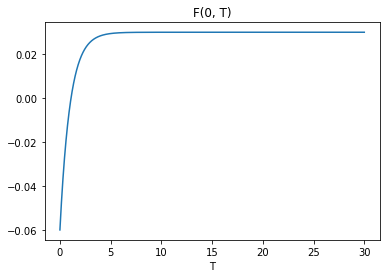

In [259]:
plt.plot(T, F)
plt.title('F(0, T)')
plt.xlabel('T')
plt.show()

### q1-c

In [284]:
sigma = 0.1
theta = 0.03
k = 1
h = np.sqrt(k**2 + 2*sigma**2) 
T = 30
N = 1000
dt = 30 / 1000

In [289]:
# Terminal condition: A[T] = 1, B[T] = 0 as initialization does
A = np.ones(N+1)
B = np.zeros(N+1)
# Euler scheme --explicit
for i in range(N-1, -1, -1):
    A[i] = A[i+1] - k*theta*B[i+1] * A[i+1]*dt
    B[i] = B[i+1] - ((1/2)*(sigma**2) * B[i+1]**2+k*B[i+1]-1)*dt
print('Explicit Euler scheme solution:\n',A[0], B[0])

Explicit Euler scheme solution:
 0.42050692229016373 0.9950493836207361


In [290]:
# Closes form solution
A0 = (2*h*np.exp((T)*(k+h)/2) / (2*h+(k+h)*(np.exp((T)*h)-1)))**\
     (2*k*theta/(sigma**2))
B0 = 2*(np.exp((T)*h)-1) / (2*h+(k+h)*(np.exp((T)*h)-1))
print('Closes form solution:\n', A0, B0)

Closes form solution:
 0.42066687427666555 0.99504938362071


From the above calculations, we know that the solutions got from Explicit Euler scheme and Closes form are pretty close.

### q1-d

In [298]:
sigma = 0.1
theta = 0.03
k = 1
h = np.sqrt(k**2 + 2*sigma**2) 
T = 30
N = 1000
dt = 30 / 1000

In [299]:
# Terminal condition: A[T] = 1, B[T] = 0 as initialization does
A = np.ones(N+1)
B = np.zeros(N+1)
# Euler scheme --implicit
for i in range(N-1, -1, -1):
    B[i] = (-(1+k*dt) + np.sqrt((1+k*dt)**2 + \
           2 *(sigma**2)*dt*(B[i+1]+dt)))/\
           (dt*sigma**2)
    A[i] = 1 / (1+k*theta*B[i]*dt) * A[i+1]
print('Implicit Euler scheme solution:\n', A[0], B[0])

Implicit Euler scheme solution:
 0.42082662803511406 0.9950493836067644


In [301]:
A0 = (2*h*np.exp((T)*(k+h)/2) / \
      (2*h+(k+h)*(np.exp((T)*h)-1)))**(2*k*theta/(sigma**2))
B0 = 2*(np.exp((T)*h)-1)/(2*h+(k+h)*(np.exp((T)*h)-1))
print('Closes form solution:\n', A0, B0)

Closes form solution:
 0.42066687427666555 0.99504938362071


Implicit Euler scheme and Closes form solutions are still pretty close.

### q1-e

In [525]:
sigma = 0.1
theta = 0.03
kappa = 1
h = math.sqrt(kappa**2 + 2*sigma**2) 
T = 30
k = list(range(1,22))

In [526]:
N = [2**k[i] for i in range(len(k))]
dt = [30 / N[i] for i in range(len(k))]

Ak = np.zeros(len(k))
Bk = np.zeros(len(k))
for i in range(len(k)-1):
    A = np.ones(N[i]+1)
    B = np.zeros(N[i]+1)
    for j in range(N[i]-1, -1, -1):
        A[j] = A[j+1] - kappa*theta*B[j+1]*A[j+1]*dt[i]
        B[j] = B[j+1] - ((1/2)*(sigma**2)*B[j+1]**2+kappa*B[j+1]-1)*dt[i]
    Ak[i] = A[0]
    Bk[i] = B[0]
Ak, Bk

(array([-5.75000000e+00,  3.56701714e+02,  2.37983005e+06,  4.05594663e-01,
         4.15541868e-01,  4.18142112e-01,  4.19411665e-01,  4.20040902e-01,
         4.20354280e-01,  4.20510673e-01,  4.20588798e-01,  4.20627842e-01,
         4.20647360e-01,  4.20657117e-01,  4.20661996e-01,  4.20664435e-01,
         4.20665655e-01,  4.20666264e-01,  4.20666569e-01,  4.20666722e-01,
         0.00000000e+00]),
 array([-2.11875000e+02, -3.21074696e+03, -1.59029924e+05,  8.31232040e-01,
         9.95049384e-01,  9.95049384e-01,  9.95049384e-01,  9.95049384e-01,
         9.95049384e-01,  9.95049384e-01,  9.95049384e-01,  9.95049384e-01,
         9.95049384e-01,  9.95049384e-01,  9.95049384e-01,  9.95049384e-01,
         9.95049384e-01,  9.95049384e-01,  9.95049384e-01,  9.95049384e-01,
         0.00000000e+00]))

In [527]:
log_error = []
for i in range(len(k)):
    log_error.append(np.log (np.sqrt((Ak[i]-A0)**2 + \
                                     (Bk [i]-B0)**2)) / (np.log(2)))
print(log_error)

[7.7344350627954075, 11.657962763255151, 21.185640882182735, -2.6037593835133968, -7.608230408558437, -8.629636829109065, -9.637856766039231, -10.641613828646156, -11.643422085201943, -12.644310385791913, -13.644750772829061, -14.644970048412722, -15.645079459513573, -16.64513410910144, -17.645161418827826, -18.645175069924395, -19.64518188323326, -20.645185318579358, -21.645187080673338, -22.64518847218298, 0.11145413591637968]


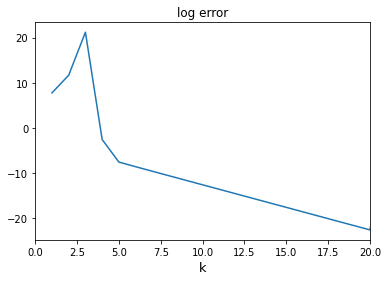

In [528]:
plt.plot(k, log_er) 
plt.title('log error') 
plt.xlim(0, 20)
plt.xlabel('k', fontsize = 13)
plt.show()

The graph tell that the log error has been pretty small after k = 5.  
The sheme has $O(\delta t)$ accuracy, which is consistent with theoratical accuracy.

### q1-f

In [521]:
k = 1
T = 30
N = 1000
dt = 30 / 1000
A = np.ones(N+1)
B = np.zeros(N+1)

for i in range(N-1, -1, -1):
    sigma = 0.1 + 0.05 * np.sin(2 * np.pi * dt*(i+1) / 30)
    theta = 0.02 + 0.06 * dt * (i+1) / 30
    A[i] = A[i+1] - k*theta*dt*B[i+1]*A[i+1]
    B[i] = B[i+1] - dt * (0.5*(sigma**2)*B[i+1]**2 + k*B[i+1] - 1)

print('Ans:', A[0], B[0])

Ans: 0.24221460612506 0.993991037132606


### q1-g

In [480]:
r0 = 0.01
sigma = 0.1
theta = 0.03
k = 1
h = np.sqrt(k**2 + 2*sigma**2) 
dt = 30 / 1000
K = list(range(1,1001)) 
T = [i * dt for i in K] 
Ak = np.zeros(len(K))
Bk = np.zeros(len(K))
P = np.zeros(len(K))
    
for i in K:
    A = np.ones(i+1)
    B = np.zeros(i+1)
    for j in range(i-1, -1, -1):
        A[j] = A[j+1] - k*theta*dt*B[j+1]*A[j+1]
        B[j] = B[j+1] - dt * (0.5*(sigma**2)*B[j+1]**2 + k*B[j+1] - 1)
    Ak[i-1] = A[0]
    Bk[i-1] = B[0]
    Pk[i-1] = Ak[i-1] * np.exp(-Bk[i-1] * r0)

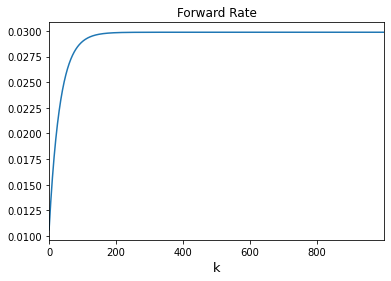

In [523]:
Fr = []
for i in range(len(K)- 1):
    Fr.append(-(np.log(Pk[i+1]) - np.log(Pk[i])) / dt)

plt.plot(Fr)
plt.xlim(0, 999)
plt.title('Forward Rate')
plt.xlabel('k', fontsize = 13)
plt.show()

The shape is similar to the graph in q1-a. This is because that the yield for the maturity T is just equivalent  
to the forward rate for time [0, T].

### a2-e

In [510]:
T = 1
k = 1
r = 0.02
delta = 0.3
N = 1000

s = k * np.exp(3 * delta * np.sqrt(T/k))
ds = s / N
M = math.ceil((delta**2*s / (ds**2)+r) * T)
dt = T / M
V = np.zeros((N+1, M+1))
S = [i * ds for i in range(N+1)] 

In [511]:
# Boundary conditions
for n in range(N + 1):
    V[n, M] = max(0, k - n * ds)

# Terminal Condition
for m in range(M+1):
    V[0, m] = k * np.exp(-r * dt * (M-m))
    V[N, m] = 0

# Recursion
for m in range(M-1, -1, -1): 
    for n in range(1, N):
        p = 1 - (delta**2) * n * dt / ds  # this is p
        pu = 0.5 * (delta**2)*n*dt/ds + 0.5 * r*n*dt  # this is p+
        pd = 0.5 * (delta**2)*n*dt/ds - 0.5 * r*n*dt  # this is p-
        V[n, m] = (p-r*dt) * V[n, m+1] + pu * V[n+1, m+1] + \
                  pd * V[n-1, m+1]

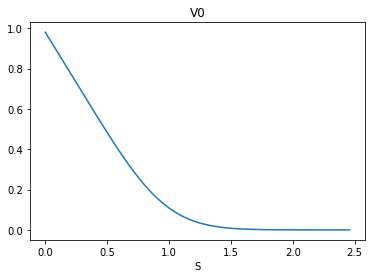

In [512]:
plt.plot(S, V[:,0]) 
plt.title('V0')
plt.xlabel('S') 
plt.show()

### q2-f

In [514]:
# Here we set M as 20000
T = 1
k = 1
r = 0.02
delta = 0.3
N = 1000
M = 20000
s0 = k * np.exp(3 * delta * np.sqrt(T/k)) 
dt = 1 / M
ds = s0 / N
V = np.zeros((N+1, M+1))
S = [i * ds for i in range(N+1)]

In [515]:
# redo the process as in 2-e
for n in range(0, N+1):
    V[n, M] = max(0, k - n * ds)

for m in range(0, M+1):
    V[0, m] = k * np.exp(-r * dt * (M-m))
    V[N, m] = 0

# Recursionn
for m in range(M-1, -1, -1): 
    for n in range(1, N):
        p = 1 - (delta**2) * n * dt / ds
        pu = 0.5 * (delta**2)*n*dt/ds + 0.5 * r*n*dt
        pd = 0.5 * (delta**2)*n*dt/ds - 0.5 * r*n*dt
        V[n, m] = (p-r*dt) * V[n, m+1] + pu * V[n+1, m+1] + \
                  pd * V[n-1, m+1]

/Users/mackenziezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/mackenziezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/Users/mackenziezhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


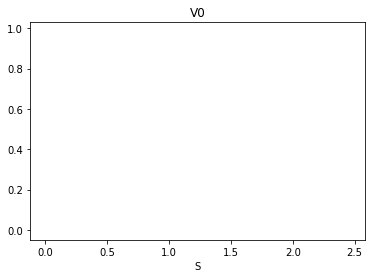

In [516]:
plt.plot(S, V[:,0]) 
plt.title('V0')
plt.xlabel('S') 
plt.show()

V would not converge when stability condition is not satisfied. The code will report error when I set M = 20000.